## 1. Initial Observation

In [77]:
import warnings

# Suppress all warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [84]:
from utilities.data_organizer import DataOrganizer

DO_3 = DataOrganizer(batch_count=3)
insertion_sort_p3p4, merge_sort_p3p4 = DO_3.merge_all_batches("10p3-10p4", "TC", split=True)


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def square_overview_plot(insertion_sort: pd.DataFrame, merge_sort: pd.DataFrame) -> None:

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

    sns.lineplot(x="length", y="insertion_sort_time", data=insertion_sort, ax=ax1)
    ax1.set_title('Insertion Sort Time')

    sns.lineplot(x="length", y="merge_sort_time", data=merge_sort, ax=ax2)
    ax2.set_title('Merge Sort Time')

    sns.lineplot(x="length", y="insertion_sort_key_comparison", data=insertion_sort, ax=ax3)
    ax3.set_title('Insertion Sort Key Comparison')

    sns.lineplot(x="length", y="merge_sort_key_comparison", data=merge_sort, ax=ax4)
    ax4.set_title('Merge Sort Key Comparison')


    plt.tight_layout()
    plt.show()


def comparison_plot(insertion_sort: pd.DataFrame, merge_sort: pd.DataFrame) -> None:

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 10))

    # ax1: sort time
    sns.lineplot(x="length", y="insertion_sort_time", data=insertion_sort, 
                label="Insertion Sort", palette="blue", ax=ax1)

    sns.lineplot(x="length", y="merge_sort_time", data=merge_sort, 
                label="Merge Sort", palette="orange", ax=ax1)

    ax1.set_title("Sort Time: Insertion Sort vs. Merge Sort")

    # ax2: key comparison
    sns.lineplot(x="length", y="insertion_sort_key_comparison", data=insertion_sort, 
                label="Insertion Sort", palette="blue", ax=ax2)

    sns.lineplot(x="length", y="merge_sort_key_comparison", data=merge_sort, 
                label="Merge Sort", palette="orange", ax=ax2)

    ax2.set_title("Key Comparison: Insertion Sort vs. Merge Sort")

    plt.tight_layout()
    plt.legend()
    plt.show()

### Sort Time and Key Comparison Count Visualization

#### Array Length Ranging: 10^3 to 10^4

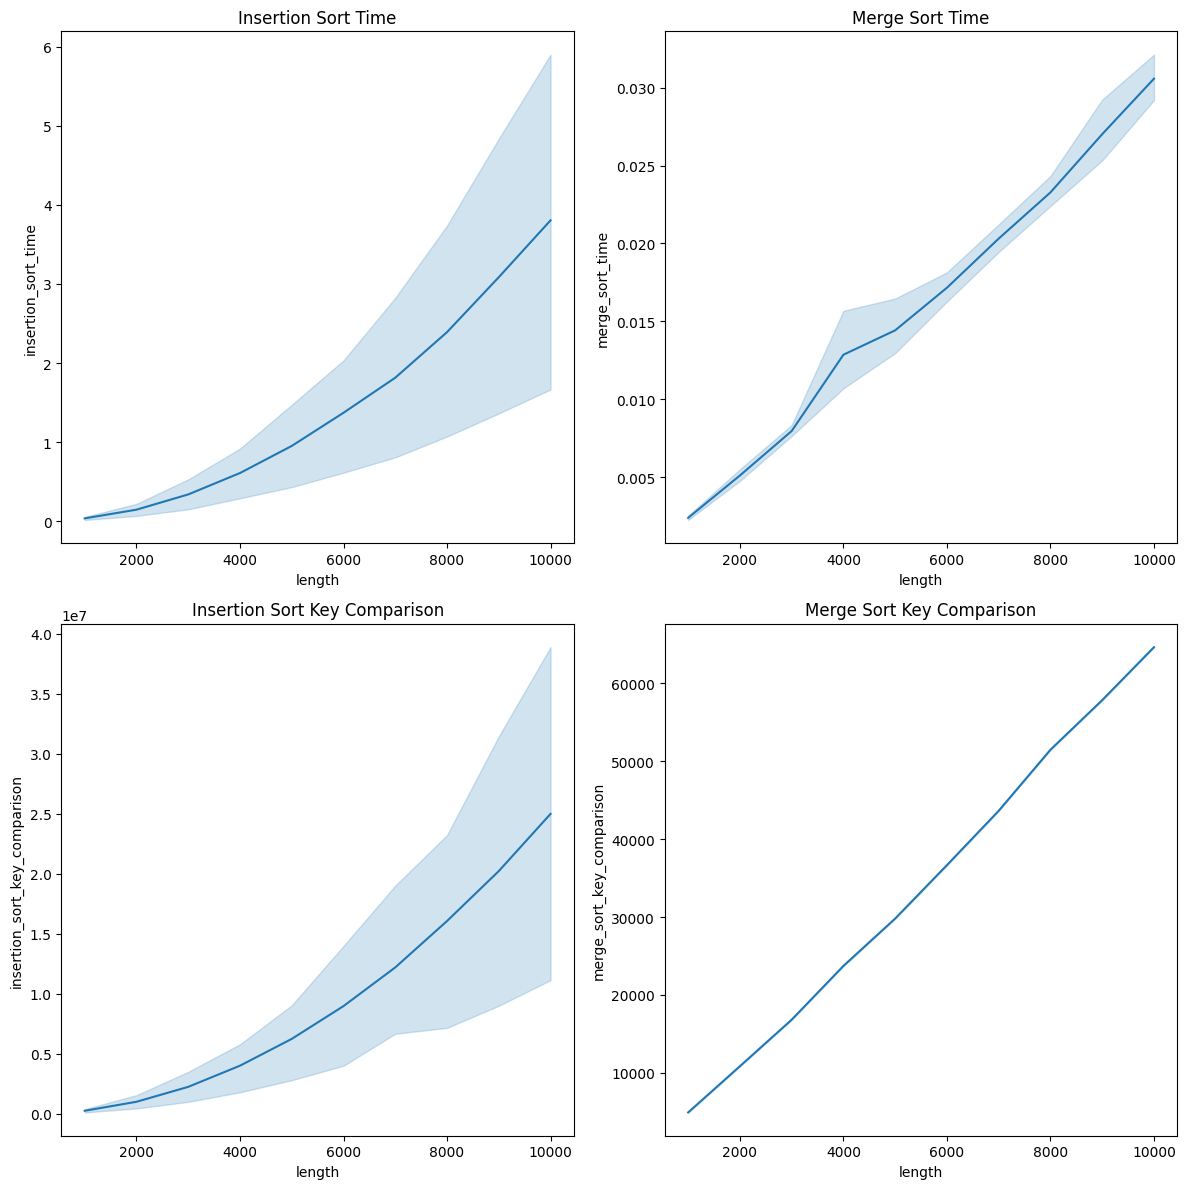

In [85]:
square_overview_plot(insertion_sort_p3p4, merge_sort_p3p4)

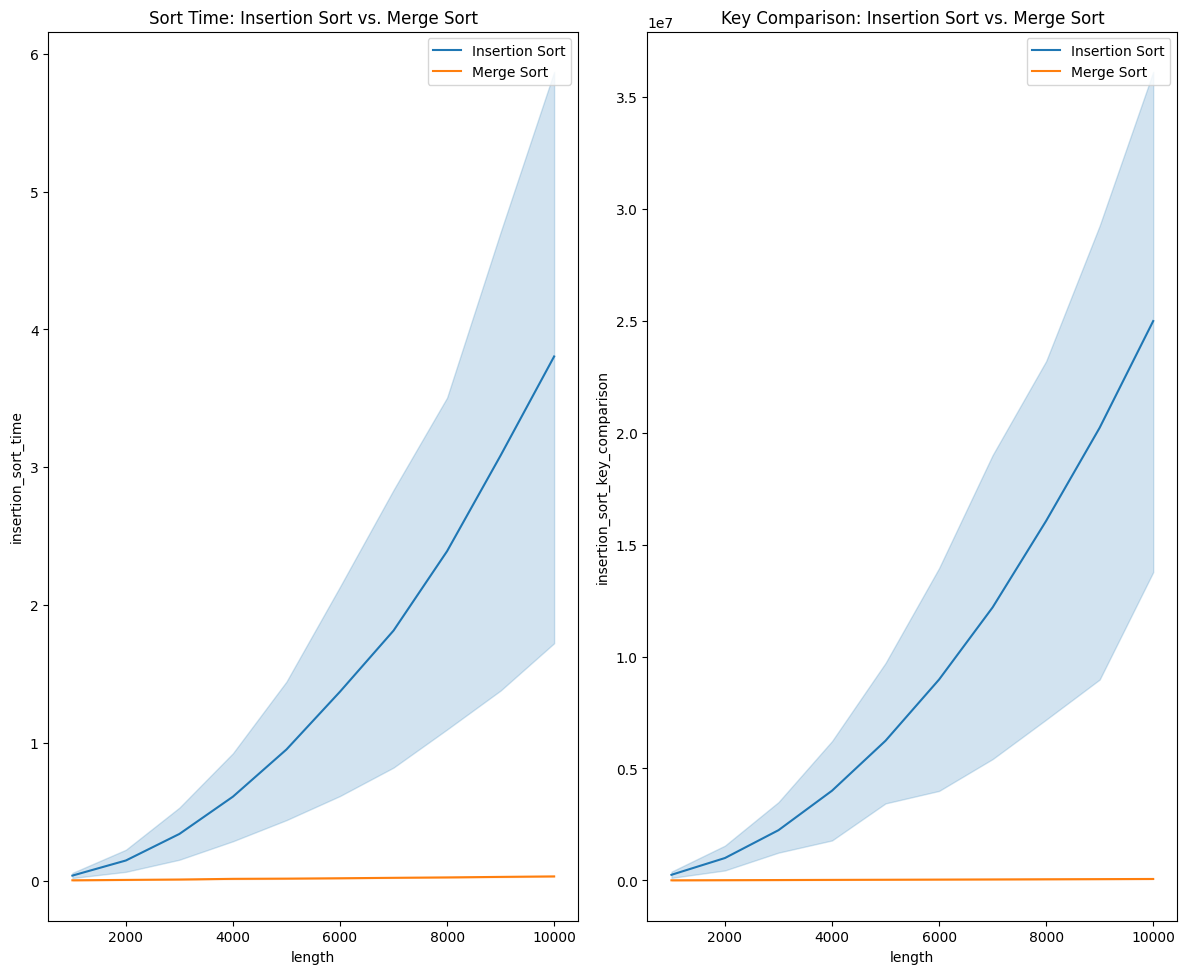

In [86]:
comparison_plot(insertion_sort_p3p4, merge_sort_p3p4)

#### Array Length Ranging: 10^2 to 10^3

In [78]:
insertion_sort_p2p3, merge_sort_p2p3 = DO_3.merge_all_batches("10p2-10p3", "TC", split=True)

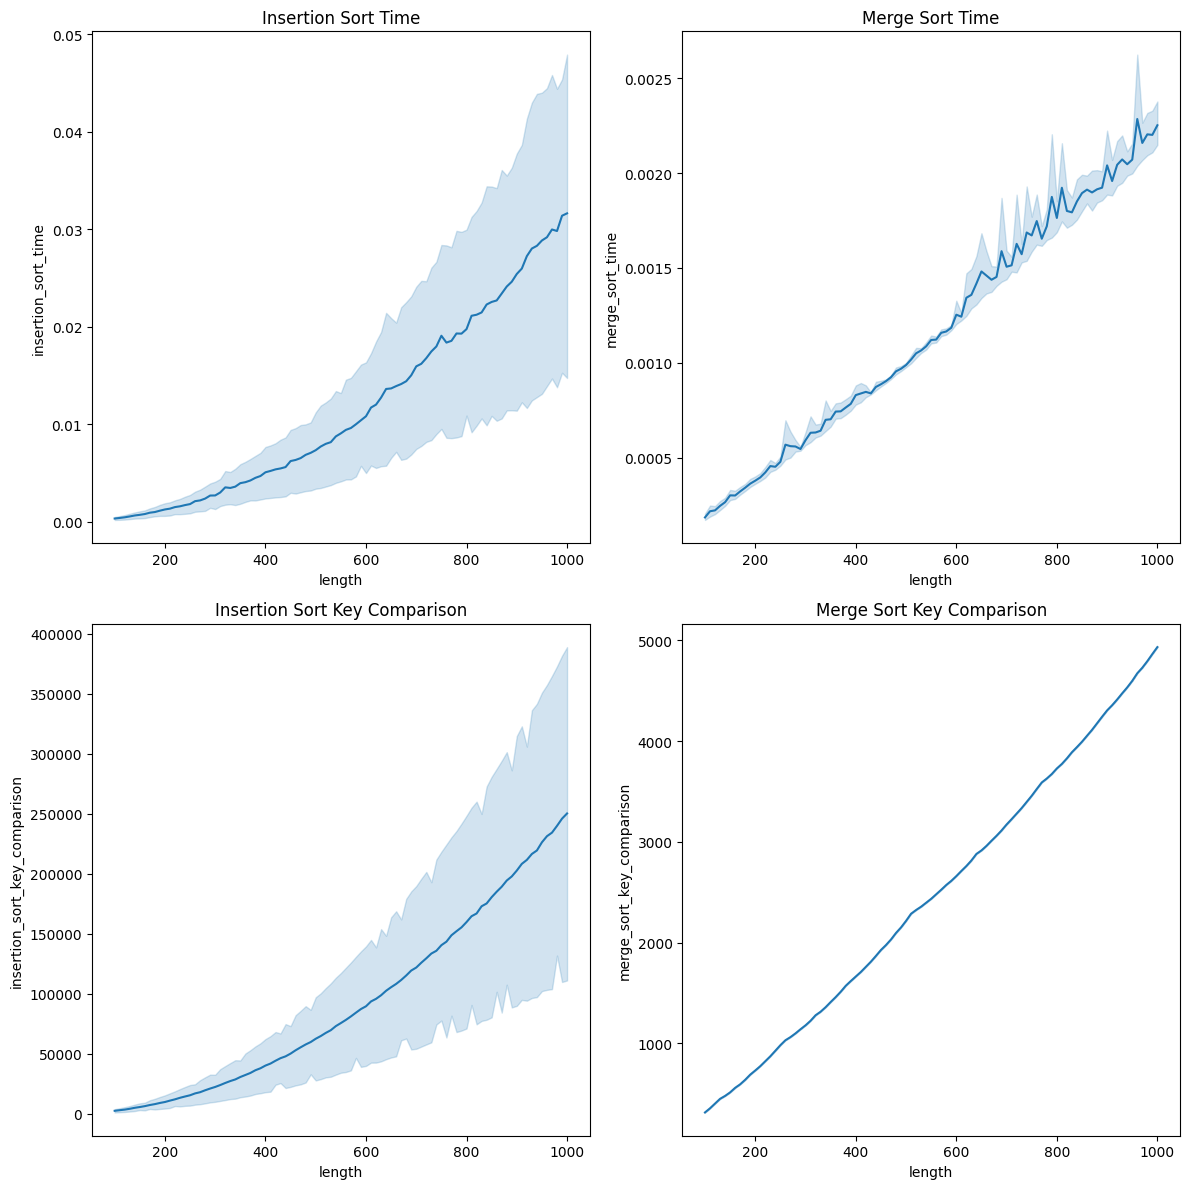

In [79]:
square_overview_plot(insertion_sort_p2p3, merge_sort_p2p3)

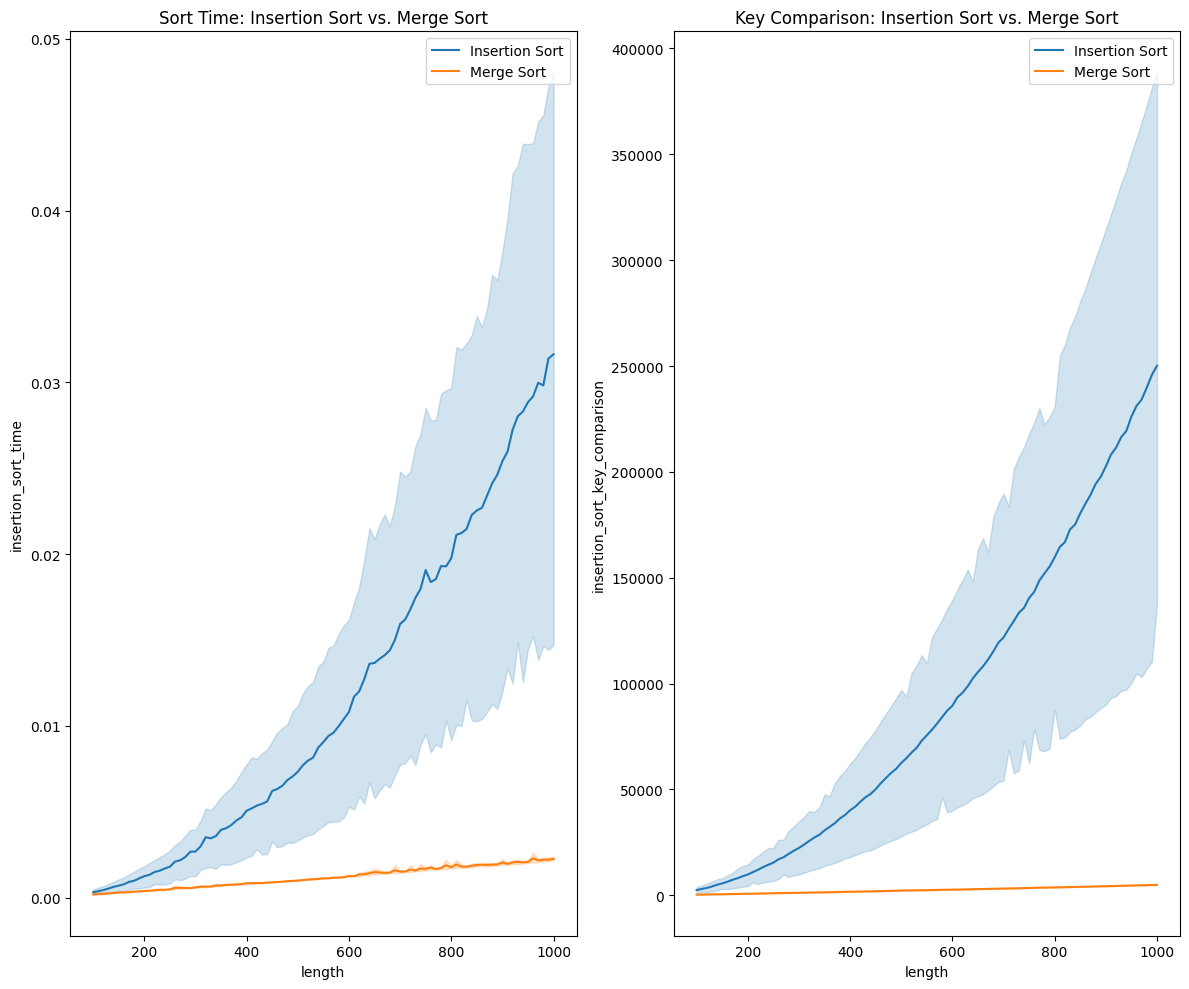

In [80]:
comparison_plot(insertion_sort_p2p3, merge_sort_p2p3)

#### Array Length Ranging: 10^0 to 10^2

In [65]:
DO_100 = DataOrganizer(batch_count=100)
insertion_sort_p0p2, merge_sort_p0p2 = DO_100.merge_all_batches("10p0-10p2", "TC", split=True)

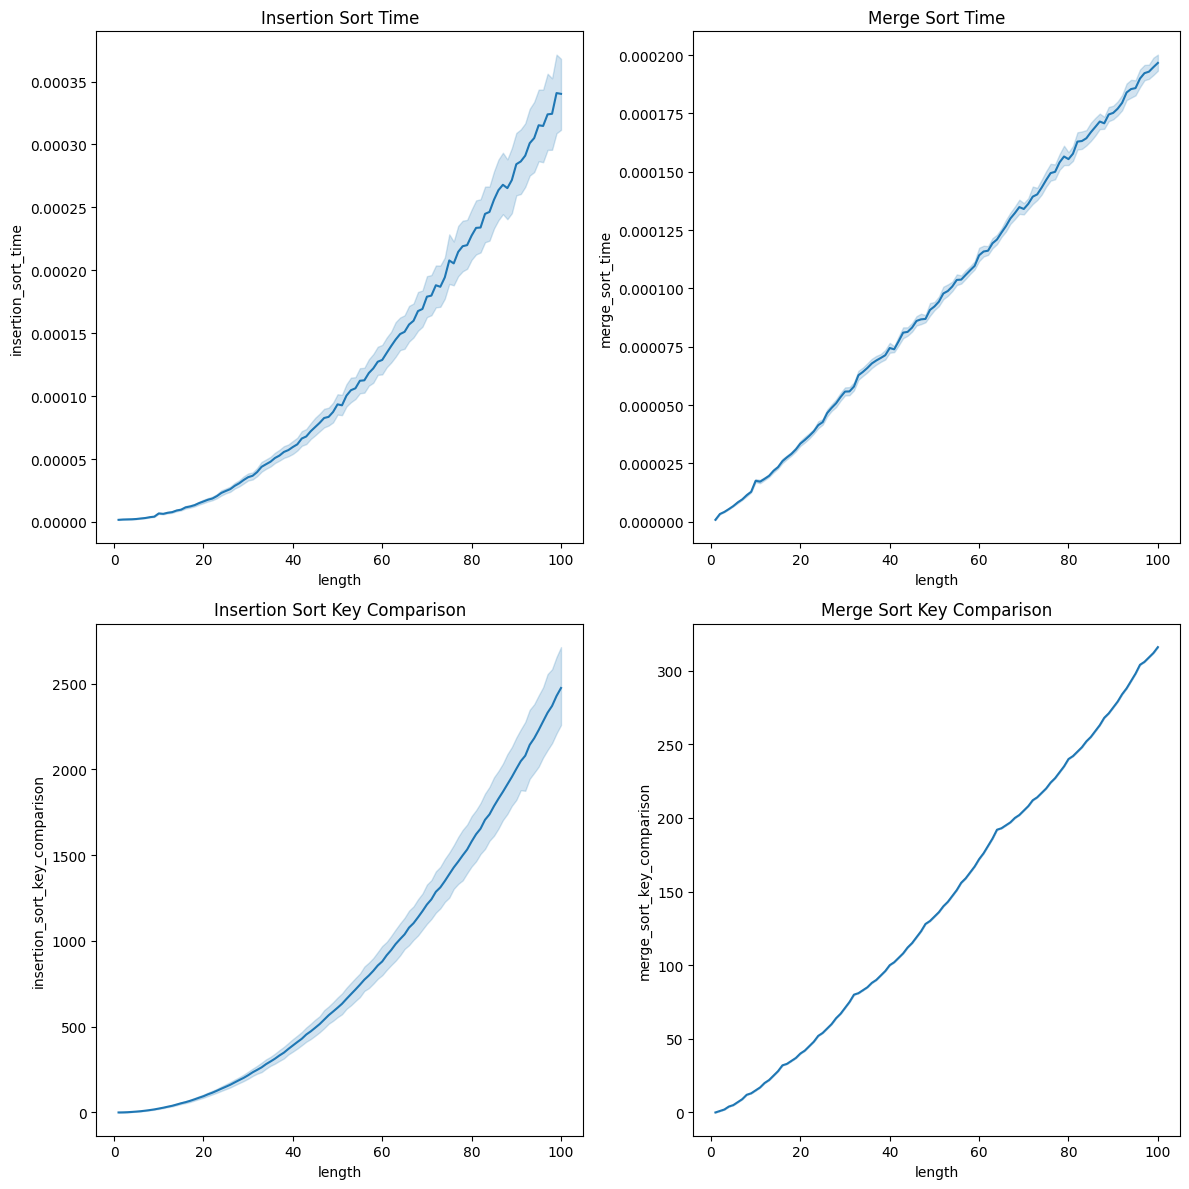

In [66]:
square_overview_plot(insertion_sort_p0p2, merge_sort_p0p2)

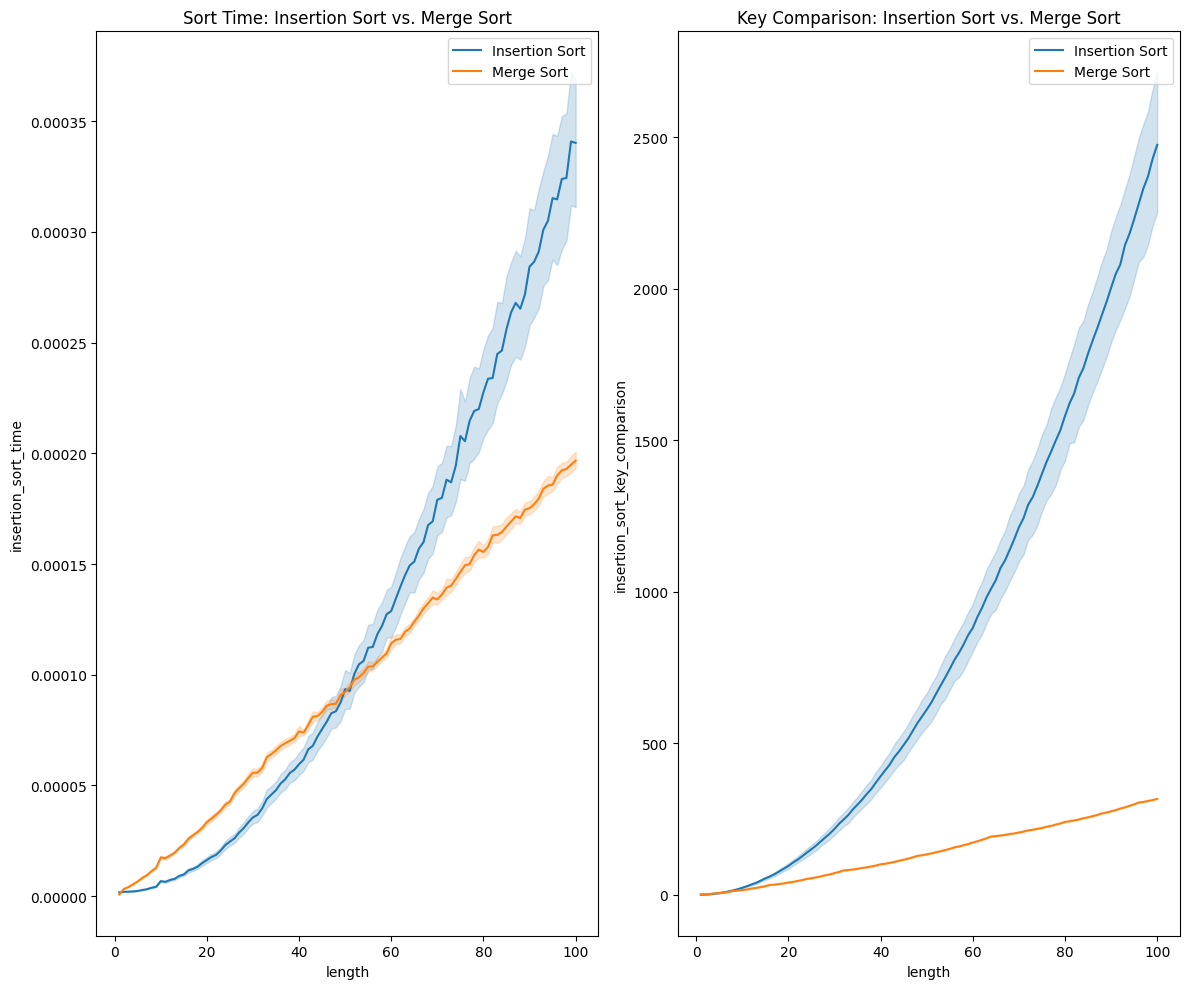

In [67]:
comparison_plot(insertion_sort_p0p2, merge_sort_p0p2)

In [92]:
def range_plot(ins_data: pd.DataFrame, merge_data: pd.DataFrame, 
               lower_bound: int, upper_bound: int) -> None:

    ins_p0p2_range_filtered = ins_data[
        (ins_data["length"] >= lower_bound) & 
        (ins_data["length"] <= upper_bound)]

    merge_p0p2_range_filtered = merge_data[
        (merge_data["length"] >= lower_bound) & 
        (merge_data["length"] <= upper_bound)]

    comparison_plot(ins_p0p2_range_filtered, merge_p0p2_range_filtered)


def filter_by_order_type(data, order_type: str) -> pd.DataFrame:
    return data[data["order_type"] == order_type]


def filter_range_plot(ins_data: pd.DataFrame, merge_data: pd.DataFrame, 
                      order_type: str, lower_bound: int, upper_bound: int) -> None:
    
    ins_p0p2_range_filtered = filter_by_order_type(ins_data, order_type)
    merge_p0p2_range_filtered = filter_by_order_type(merge_data, order_type)

    range_plot(ins_p0p2_range_filtered, merge_p0p2_range_filtered, lower_bound, upper_bound)

##### Worst case: ```descending```

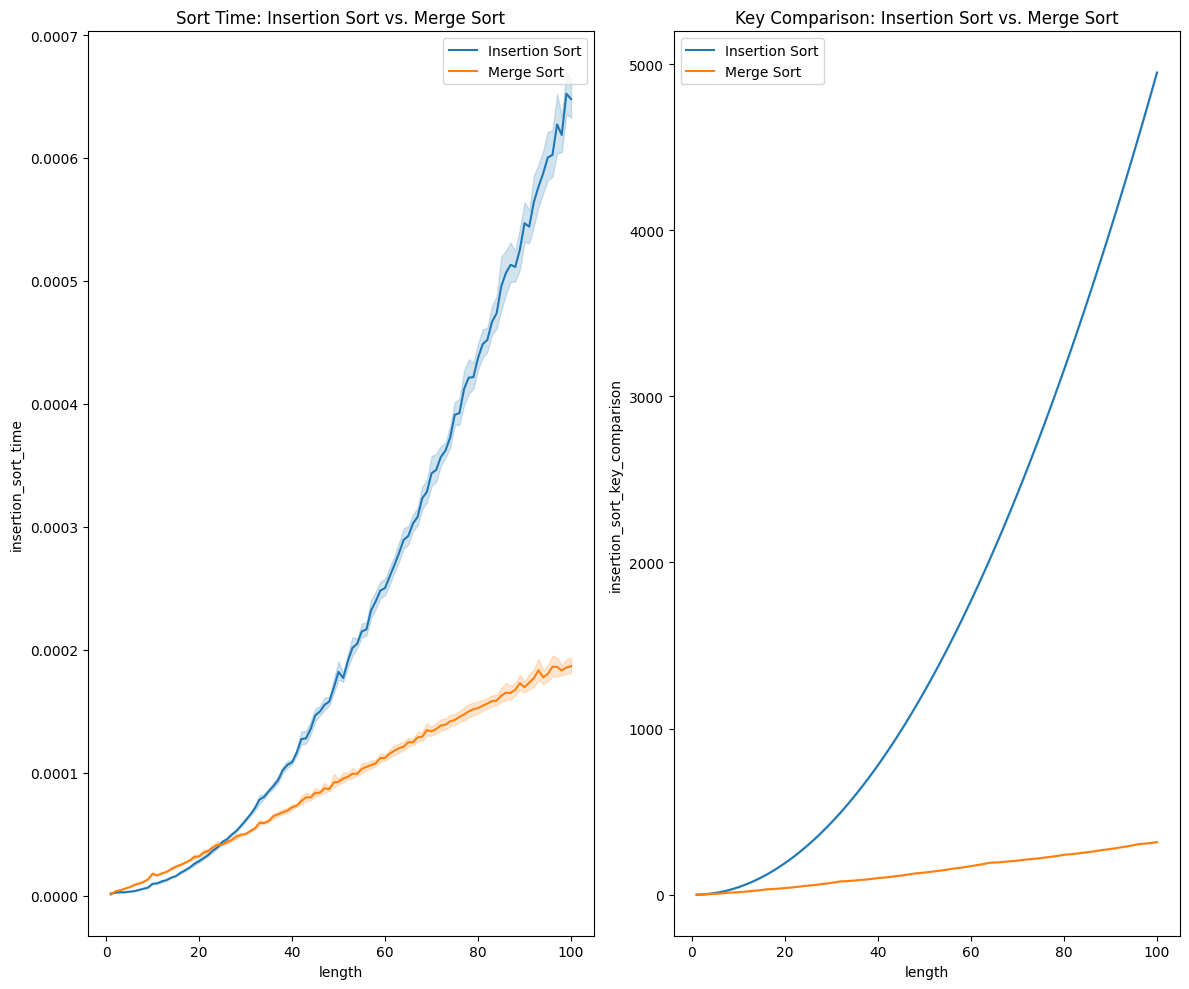

In [96]:
ins_p0p2_order_desc = filter_by_order_type(insertion_sort_p0p2, "descending")
merge_p0p2_order_desc = filter_by_order_type(merge_sort_p0p2, "descending")

comparison_plot(ins_p0p2_order_desc, merge_p0p2_order_desc)

Here, we see the intersection point between the worst case sort time of ```insertion_sort``` and ```merge_sort```. Let's take a zoom in view:

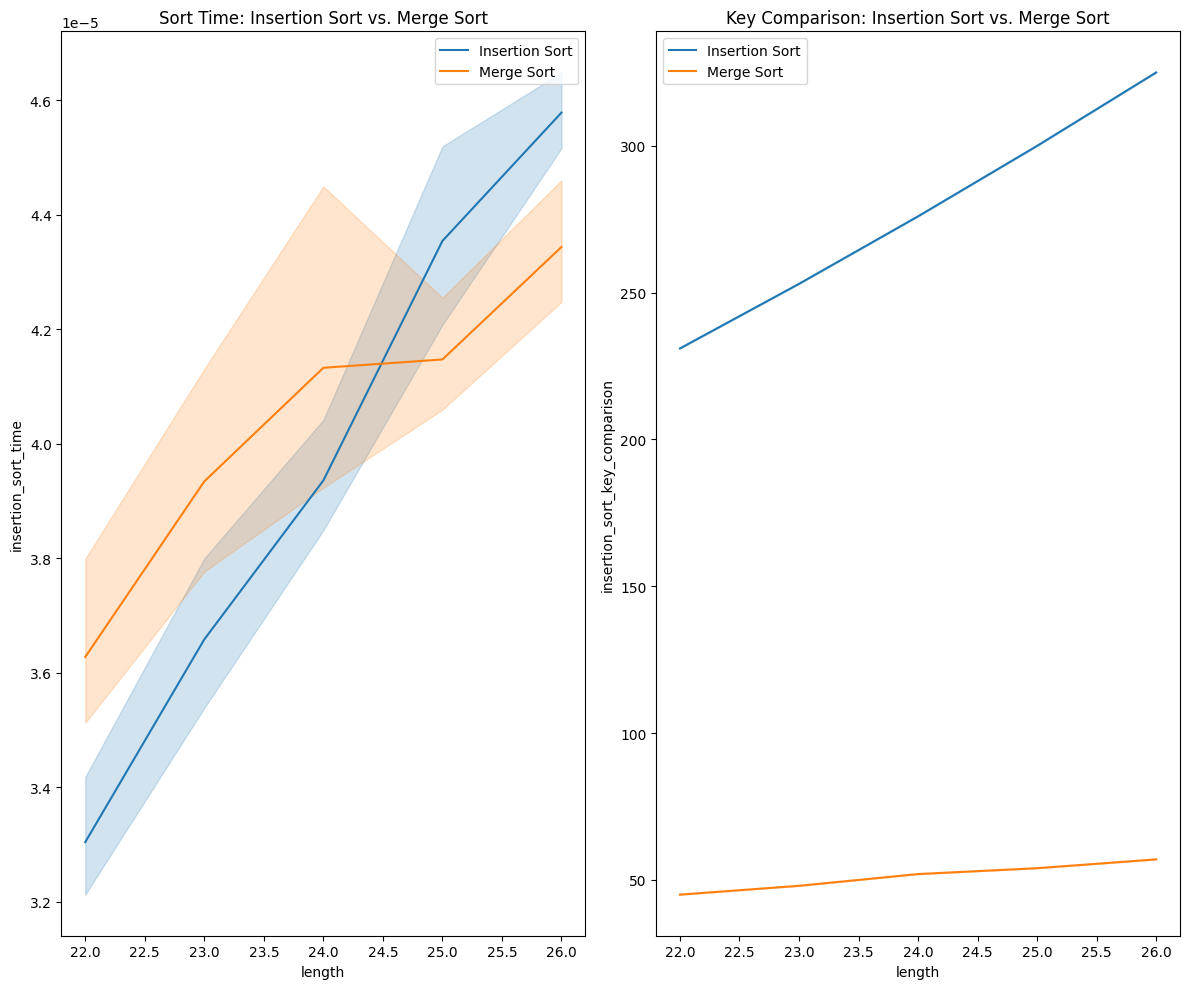

In [95]:
range_plot(ins_p0p2_order_desc, merge_p0p2_order_desc, 22, 26)

The ```length``` range of exploration for the worst case would be from ```22``` to ```26```

##### Average case: ```random```

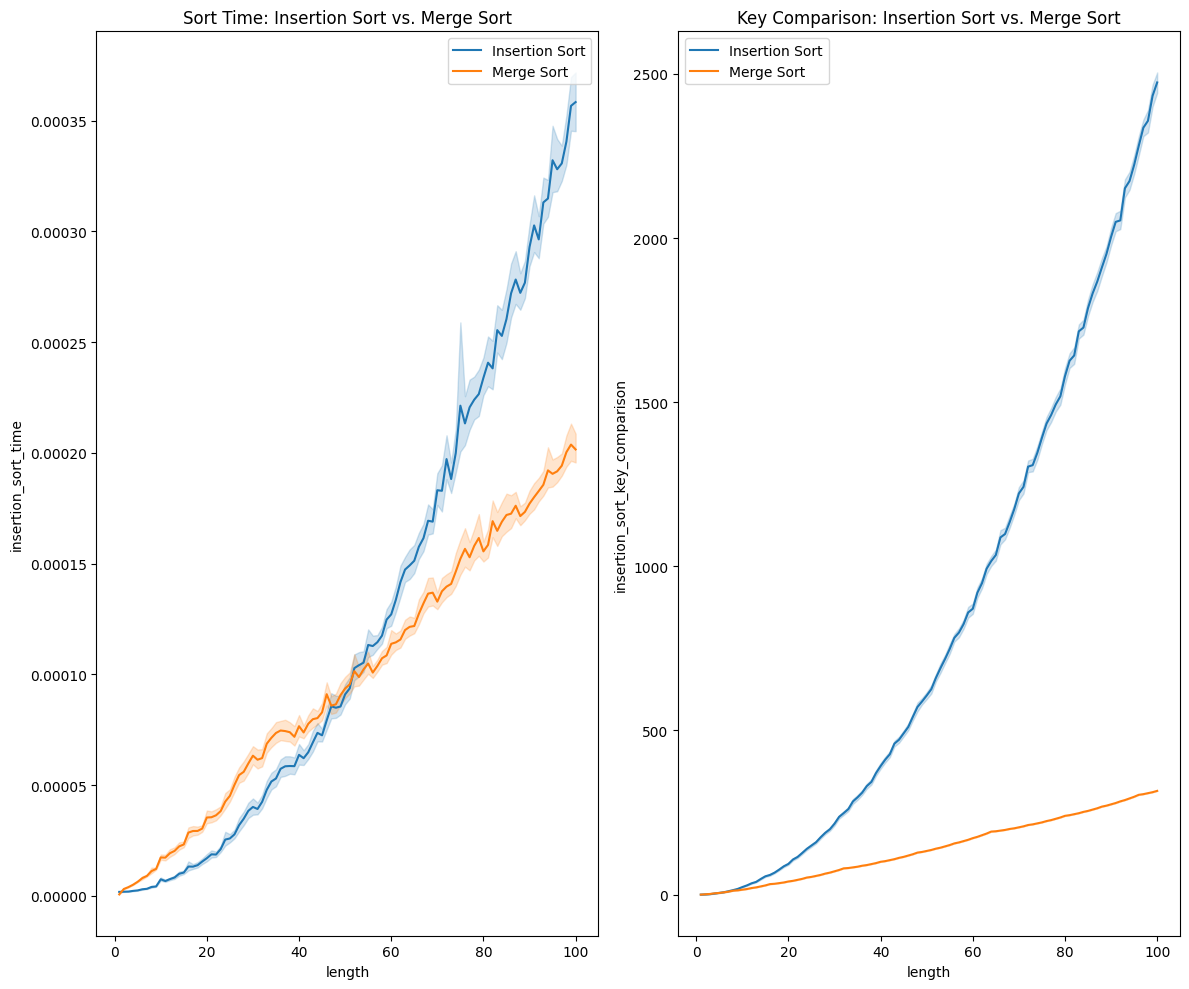

In [97]:
ins_p0p2_order_random = filter_by_order_type(insertion_sort_p0p2, "random")
merge_p0p2_order_random = filter_by_order_type(merge_sort_p0p2, "random")

comparison_plot(ins_p0p2_order_random, merge_p0p2_order_random)

Similarly, we see the intersection point between the average case sort time of ```insertion_sort``` and ```merge_sort```. Let's take a zoom in view:

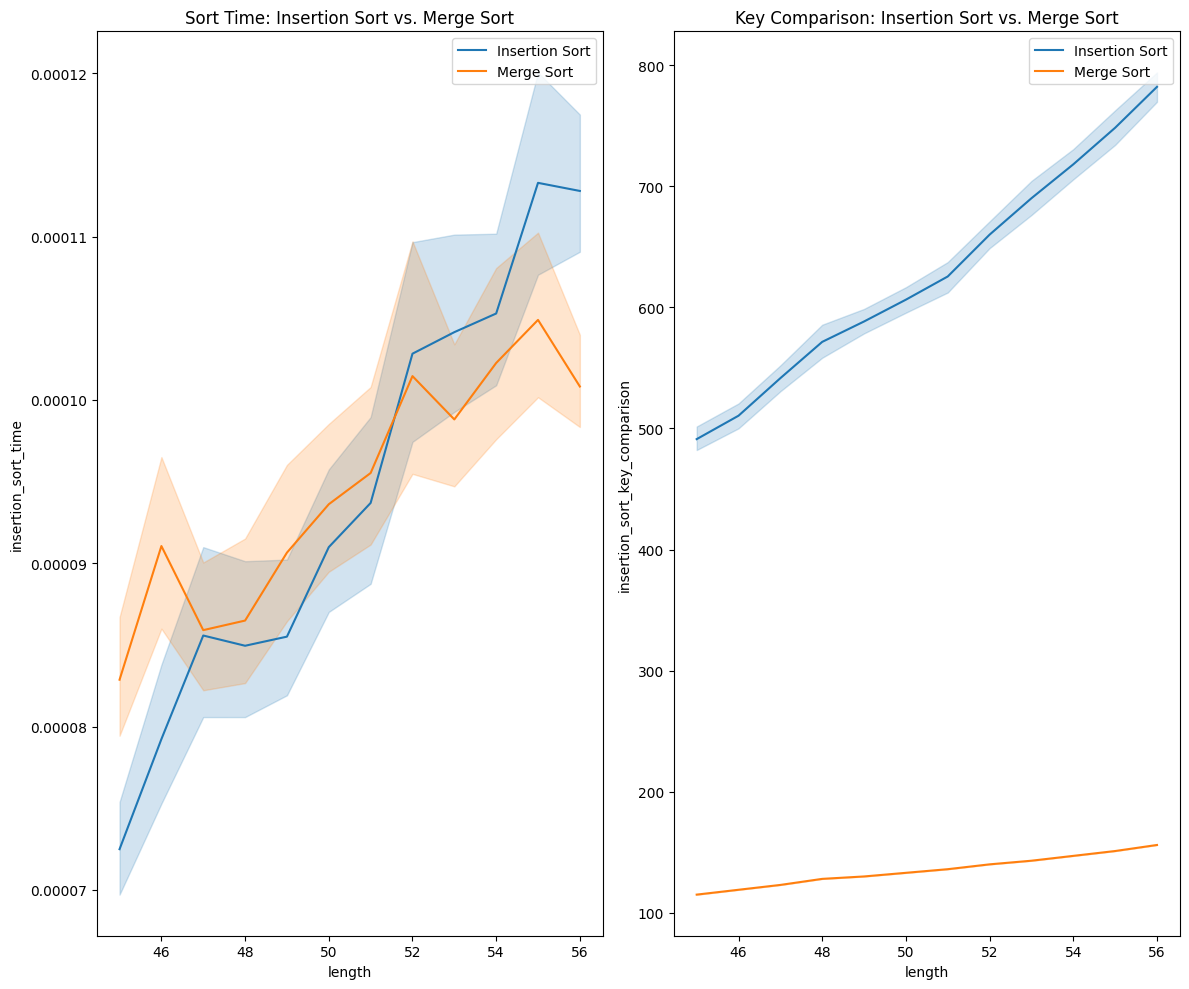

In [105]:
range_plot(ins_p0p2_order_random, merge_p0p2_order_random, 45, 56)

The ```length``` range of exploration for the average case would be from ```45``` to ```55```

The ```average_runtime``` and ```average_key_comparisons``` will be evaluated for the **Hybrid Sort** algorithm throughout the given ranges of ```S```:
- ```22``` to ```26``` -> from the Worst case
- ```45``` to ```55``` -> from the Average case

And among these candidates, the optimal ```S``` value would be found.